<a href="https://colab.research.google.com/github/wbastias/API_JAVA/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.GOF98A_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
metadatos
#para ver si esta cargado la informacion de meta datos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmpj3pcwwz2tfds'),
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

image  label
0  [[[251, 255, 255], [248, 254, 252], [242, 246,...      1
1  [[[221, 171, 118], [191, 140, 87], [236, 178, ...      1
2  [[[174, 180, 152], [182, 188, 160], [189, 195,...      1
3  [[[91, 65, 6], [93, 67, 8], [92, 66, 7], [92, ...      0
4  [[[139, 137, 138], [140, 138, 139], [141, 139,...      1
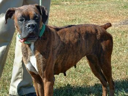
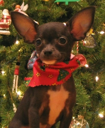
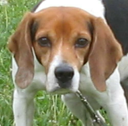
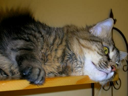
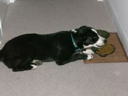

In [5]:
tfds.as_dataframe(datos['train'].take(5), metadatos)
# esto es la imagen con la lista y su caracteristica

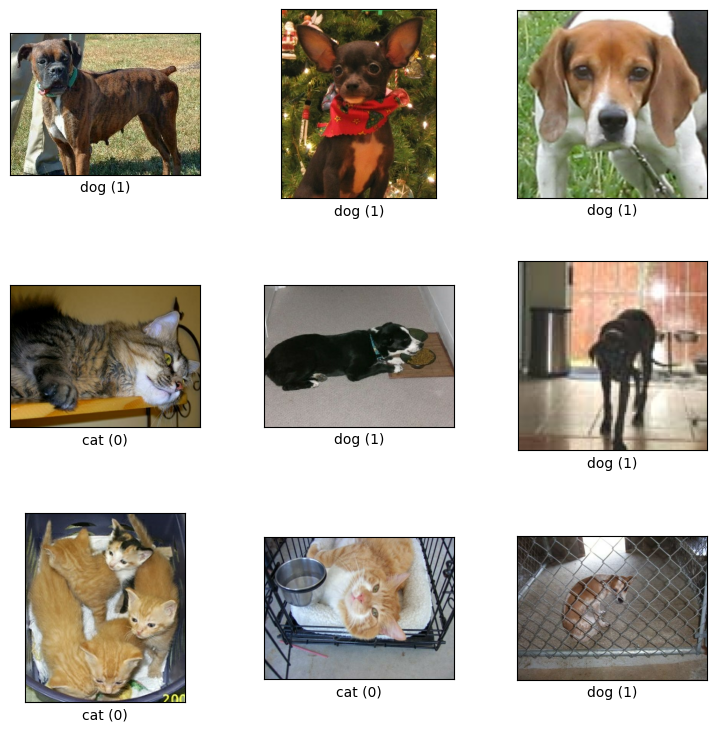

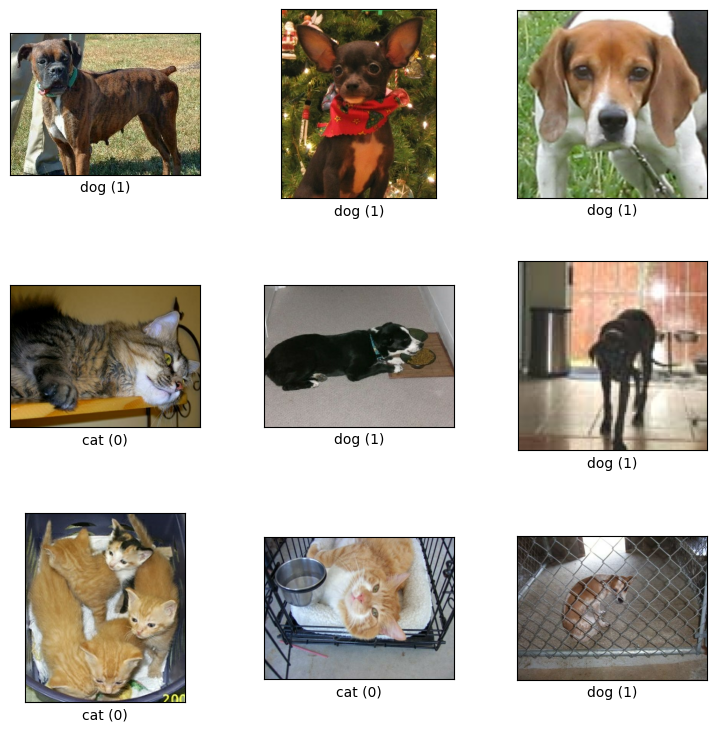

In [6]:
tfds.show_examples(datos['train'],metadatos)
#aqui muestra la imagen con su nombre debajo de la imagen

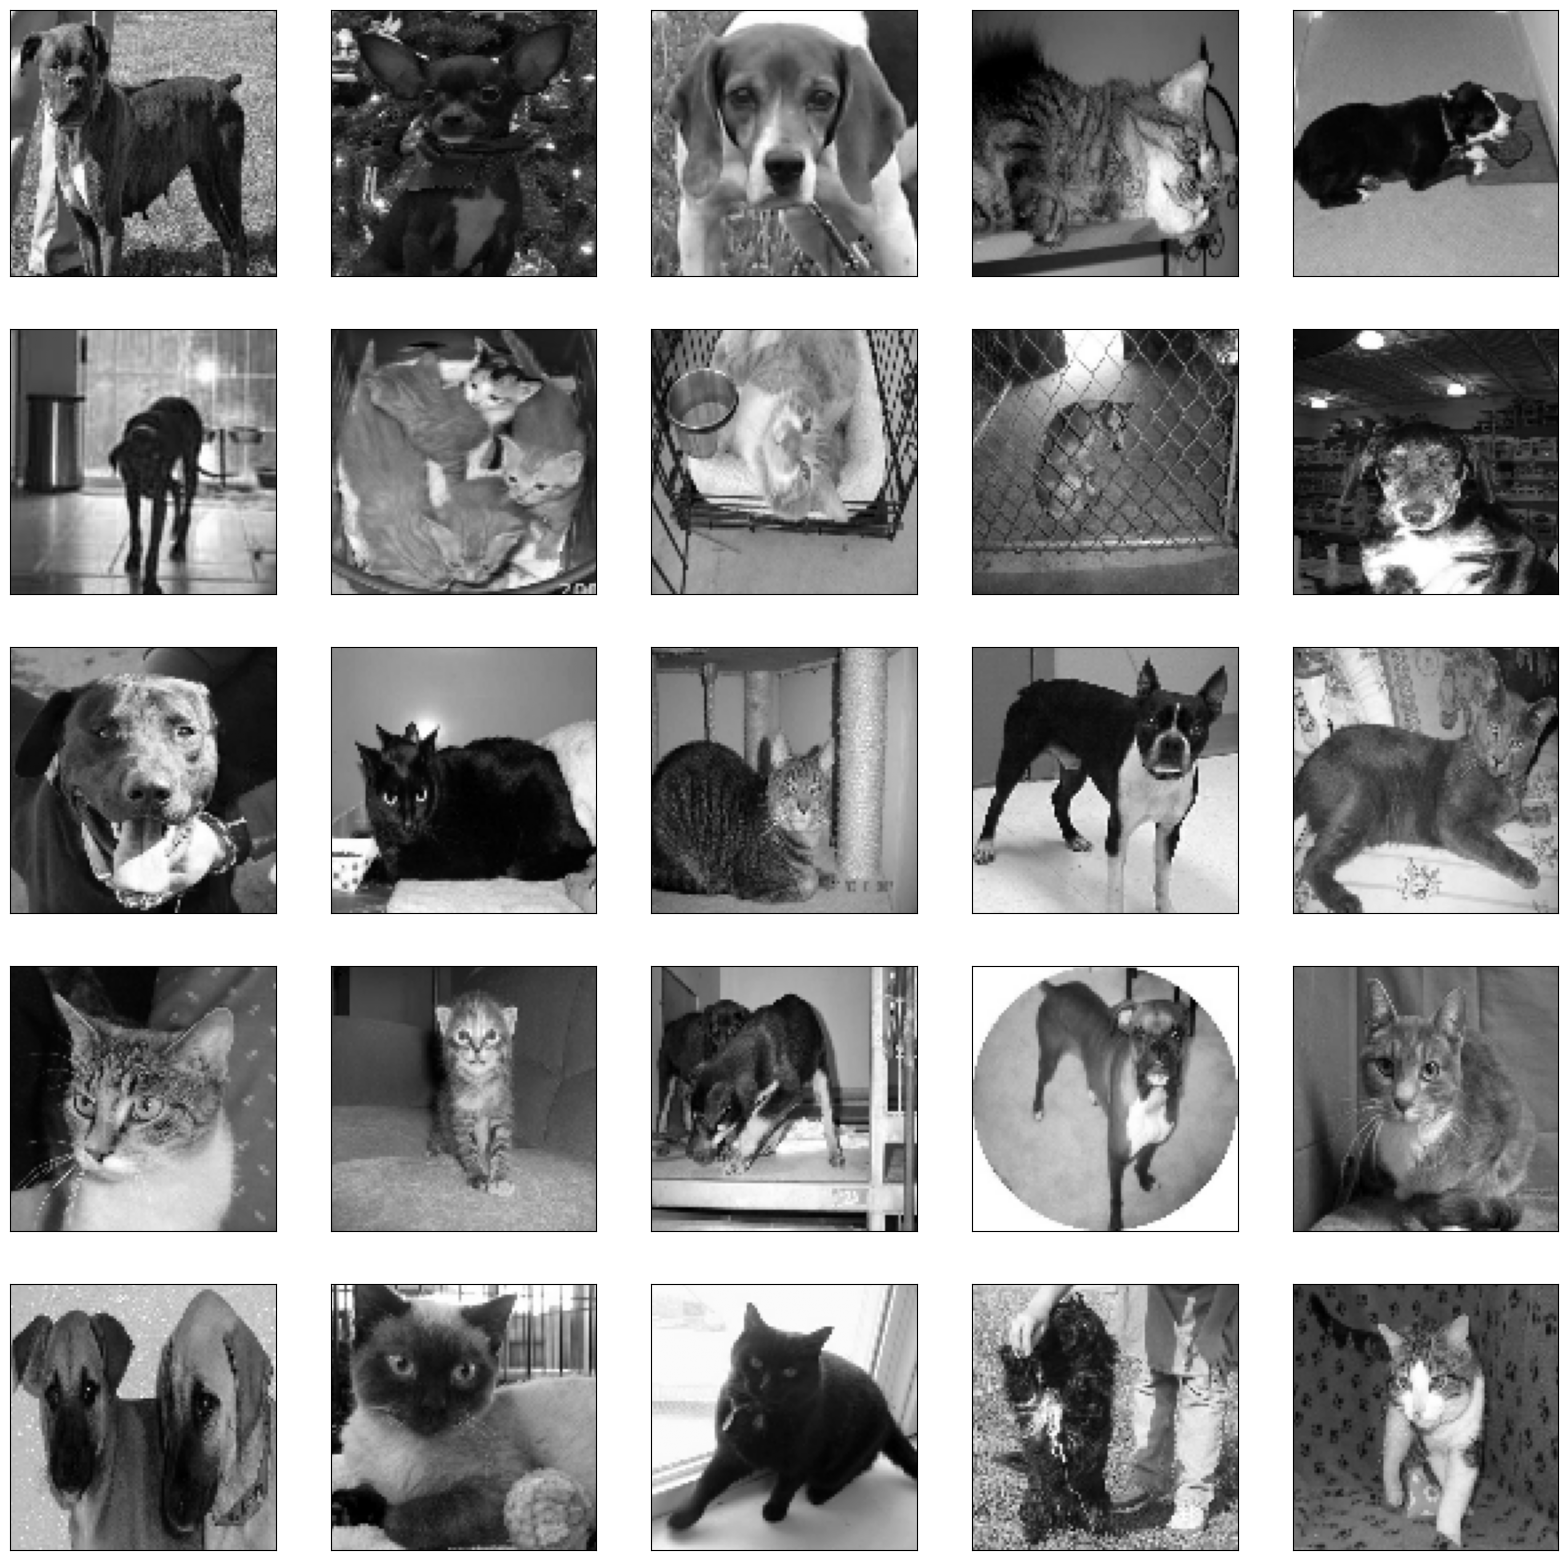

In [29]:
import matplotlib.pyplot as plt
#para que tengan el mismo tamaño las imagenes libreria de python opencv_python
import cv2
    #solo se muestra la imagen
    #para hacer que las imagenes sean mas grande
plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
    #muestra las dos imagene con subplot cantidad de colimna y filas y las suma con el i+1
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  # en imagen cambiamos el tamaño
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [30]:
datos_entrenamiento = []
#una variable con una lista vacia

In [31]:
for i, (imagen, etiqueta) in enumerate(datos['train']):#todos los datos
  #muestra las dos imagene con subplot cantidad de colimna y filas y las suma con el i+1
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) # CAMBIAR TAMANO A 100,100,1
  datos_entrenamiento.append([imagen, etiqueta])

In [32]:
datos_entrenamiento[0]

[array([[[249],
         [190],
         [105],
         ...,
         [189],
         [196],
         [143]],
 
        [[232],
         [127],
         [ 88],
         ...,
         [187],
         [180],
         [186]],
 
        [[171],
         [ 87],
         [ 83],
         ...,
         [129],
         [158],
         [166]],
 
        ...,
 
        [[113],
         [173],
         [162],
         ...,
         [143],
         [156],
         [119]],
 
        [[140],
         [152],
         [171],
         ...,
         [ 98],
         [155],
         [154]],
 
        [[ 91],
         [109],
         [167],
         ...,
         [ 46],
         [ 51],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [33]:
len(datos_entrenamiento)

23262

In [34]:
x =[] # todas las imagenes entradas (pixeles)
y =[] #etiquetas (perro o gatos)

for imagen, etiqueta in datos_entrenamiento:
  x.append(imagen)
  y.append(etiqueta)

In [35]:
x

[array([[[249],
         [190],
         [105],
         ...,
         [189],
         [196],
         [143]],
 
        [[232],
         [127],
         [ 88],
         ...,
         [187],
         [180],
         [186]],
 
        [[171],
         [ 87],
         [ 83],
         ...,
         [129],
         [158],
         [166]],
 
        ...,
 
        [[113],
         [173],
         [162],
         ...,
         [143],
         [156],
         [119]],
 
        [[140],
         [152],
         [171],
         ...,
         [ 98],
         [155],
         [154]],
 
        [[ 91],
         [109],
         [167],
         ...,
         [ 46],
         [ 51],
         [ 47]]], dtype=uint8),
 array([[[149],
         [114],
         [ 93],
         ...,
         [103],
         [ 72],
         [ 81]],
 
        [[127],
         [ 63],
         [ 79],
         ...,
         [131],
         [ 70],
         [ 98]],
 
        [[ 82],
         [ 65],
         [ 58],
         ...,
      

In [36]:
import numpy as np
#para tener valores entre cero y 1 en ves de tener entre cero y 255
x = np.array(x).astype(float) / 255

In [37]:
x

array([[[[0.97647059],
         [0.74509804],
         [0.41176471],
         ...,
         [0.74117647],
         [0.76862745],
         [0.56078431]],

        [[0.90980392],
         [0.49803922],
         [0.34509804],
         ...,
         [0.73333333],
         [0.70588235],
         [0.72941176]],

        [[0.67058824],
         [0.34117647],
         [0.3254902 ],
         ...,
         [0.50588235],
         [0.61960784],
         [0.65098039]],

        ...,

        [[0.44313725],
         [0.67843137],
         [0.63529412],
         ...,
         [0.56078431],
         [0.61176471],
         [0.46666667]],

        [[0.54901961],
         [0.59607843],
         [0.67058824],
         ...,
         [0.38431373],
         [0.60784314],
         [0.60392157]],

        [[0.35686275],
         [0.42745098],
         [0.65490196],
         ...,
         [0.18039216],
         [0.2       ],
         [0.18431373]]],


       [[[0.58431373],
         [0.44705882],
         [0.36

In [38]:
y

[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [39]:
y = np.array(y) # para que nos de solo valores 1 y cero

In [40]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [41]:
x.shape # indica que existe 23262 imagenes de tamaños 100 por 100, con color 1 que es blanco y negro

(23262, 100, 100, 1)

In [46]:
#entrenar el modelo denso

modeloDenso = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
#red neuroal convolucional 32, 64, 128 filtros
#dos modelos convucionario
modelCNN = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    # una paca de 100 neuras y una salida con signui
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#complilar todos los modelos con adam

modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#no binario donde se optiene dos opciones de salida